In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pickle
import pandas as pd
import statistics as stats
from matplotlib import pyplot as plt

In [7]:
with open("../gamesData2022.pickle", "rb") as f:
    data = pickle.load(f)


# https://www.baseball-reference.com/boxes/ANA/ANA202204070.shtml example

### Explore on stadium of whole season

In [10]:
stadium_cap = pd.read_csv("../sportsdata/stadium.csv")
stadium_cap = stadium_cap.dropna(subset=["Capacity"])
stadium_cap

,StadiumID,Active,Name,City,State,Country,Capacity,Surface,LeftField,MidLeftField,...,CenterField,MidRightCenterField,RightCenterField,MidRightField,RightField,GeoLat,GeoLong,Altitude,HomePlateDirection,Type
0,1,True,PETCO Park,San Diego,CA,USA,41164.0,Grass,334.0,351.0,...,396.0,403.0,378.0,351.0,322.0,32.707300,-117.156600,14.0,180.0,Outdoor
1,2,True,Turner Field,Atlanta,GA,USA,49586.0,Grass,335.0,360.0,...,401.0,394.0,390.0,358.0,330.0,33.734805,-84.389996,939.0,150.0,Outdoor
7,8,True,Citi Field,New York,NY,USA,41922.0,Grass,335.0,371.0,...,408.0,415.0,378.0,372.0,330.0,40.756944,-73.845833,13.0,165.0,Outdoor
9,10,True,Progressive Field,Cleveland,OH,USA,37675.0,Grass,325.0,369.0,...,405.0,388.0,375.0,364.0,325.0,41.495833,-81.685278,673.0,180.0,Outdoor
12,13,True,Oracle Park,San Francisco,CA,USA,41915.0,Grass,339.0,346.0,...,399.0,399.0,421.0,368.0,309.0,37.778611,-122.389167,8.0,90.0,Outdoor
13,14,True,Target Field,Minneapolis,MN,USA,39021.0,Grass,339.0,355.0,...,404.0,392.0,367.0,344.0,328.0,44.981667,-93.278333,840.0,105.0,Outdoor
17,18,True,Tropicana Field,St. Petersburg,FL,USA,31042.0,AstroTurf,315.0,354.0,...,404.0,404.0,370.0,342.0,322.0,27.768333,-82.653333,41.0,135.0,Dome
18,19,True,Miller Park,Milwaukee,WI,USA,41900.0,Grass,344.0,359.0,...,400.0,386.0,374.0,354.0,345.0,43.028333,-87.971111,602.0,45.0,RetractableDome
20,21,True,Globe Life Park in Arlington,Arlington,TX,USA,48114.0,Grass,354.0,357.0,...,400.0,407.0,379.0,356.0,349.0,32.751389,-97.082778,549.0,45.0,Outdoor
21,22,True,Oriole Park at Camden Yards,Baltimore,MD,USA,45971.0,Grass,333.0,368.0,...,410.0,400.0,373.0,341.0,318.0,39.283889,-76.621667,35.0,150.0,Outdoor


In [11]:
def find_cap(cap_df: pd.DataFrame, name: str):
    name = name.lower()
    for i in range(len(cap_df)):
        statdium_name = cap_df.iloc[i]["Name"].lower()
        if name in statdium_name or statdium_name in name:
            return int(cap_df.iloc[i]["Capacity"])

    return -1

find_cap(stadium_cap, "PETCO Park")

41164

In [32]:
years = ["2015", "2016", "2017", "2018", "2019", "2021", "2022"]

for year in years:
    with open(f"../gamesData{year}.pickle", "rb") as f:
        data = pickle.load(f)

    att = list()
    for key in data.keys():
        try:
            meta_game_info = data[key]["meta_game_info"]
            if meta_game_info["have_att"]:
                att.append(int(meta_game_info["att"]))
        except TypeError:
            # print(data[key])
            print(key)


    print("Year: ", year)
    print("Mean: ", stats.fmean(att))
    print("Stdev: ", stats.stdev(att))

Year:  2015
Mean:  32530.085714285713
Stdev:  11120.34722081047
Year:  2016
Mean:  30370.703658536586
Stdev:  9875.466702721982
https://www.baseball-reference.com/boxes/SLN/SLN201704271.shtml
https://www.baseball-reference.com/boxes/COL/COL201705091.shtml
Year:  2017
Mean:  30277.306563391765
Stdev:  9932.55950955616
Year:  2018
Mean:  28975.353546910756
Stdev:  10952.26814369601
Year:  2019
Mean:  28588.88304808476
Stdev:  11286.444232365095
Year:  2021
Mean:  19258.714872637633
Stdev:  11231.409313315184
Year:  2022
Mean:  27125.947239263805
Stdev:  11459.159815985437


In [12]:
with open("../gamesData2022.pickle", "rb") as f:
    data = pickle.load(f)


# https://www.baseball-reference.com/boxes/ANA/ANA202204070.shtml example

stadiums = set([data[key]["meta_game_info"]["venue"].replace("Venue: ", "") for key in data.keys()])
stadium_att = {k: list() for k in stadiums}

for key in data.keys():
    meta_game_info = data[key]["meta_game_info"]
    venue = meta_game_info["venue"].replace("Venue: ", "")
    stadium_att[venue].append(meta_game_info["att"])

result_df = pd.DataFrame(columns=["Name", "mean", "stdev", "cnt", "cap"])

for key in stadium_att.keys():
    # print(key)
    cap = find_cap(stadium_cap, key)
    if len(stadium_att[key]) == 1:
        # print("mean: ", stats.fmean(stadium_att[key]), "cap: ", cap)
        result_df = result_df.append({
            "Name": key,
            "mean": stats.fmean(stadium_att[key]),
            "stdev": None,
            "cnt": 1,
            "cap": cap,
        }, ignore_index=True)
        continue

    result_df = result_df.append({
            "Name": key,
            "mean": stats.fmean(stadium_att[key]),
            "stdev": stats.stdev(stadium_att[key]),
            "cnt": len(stadium_att[key]),
            "cap": cap,
        }, ignore_index=True)
    # print("mean: ", stats.fmean(stadium_att[key]), "stdev: ", stats.stdev(stadium_att[key]), "cnt: ", len(stadium_att[key]), "cap: ", cap)

result_df

,Name,mean,stdev,cnt,cap
0,Guaranteed Rate Field,24806.901235,6636.070312,81,40615
1,Fenway Park,32408.506173,3170.437257,81,37499
2,Progressive Field,16879.858824,8099.08779,85,37675
3,Minute Maid Park,33907.625,4941.269594,88,41574
4,Target Field,22236.135802,6023.475502,81,39021
5,Coors Field,32067.0,8542.018696,81,50398
6,Oriole Park at Camden Yards,17073.7125,8994.845557,80,45971
7,Muncy Bank Ballpark,2467.0,None,1,2366
8,RingCentral Coliseum,9848.7625,7354.730165,80,-1
9,Nationals Park,25017.296296,6419.900707,81,41341


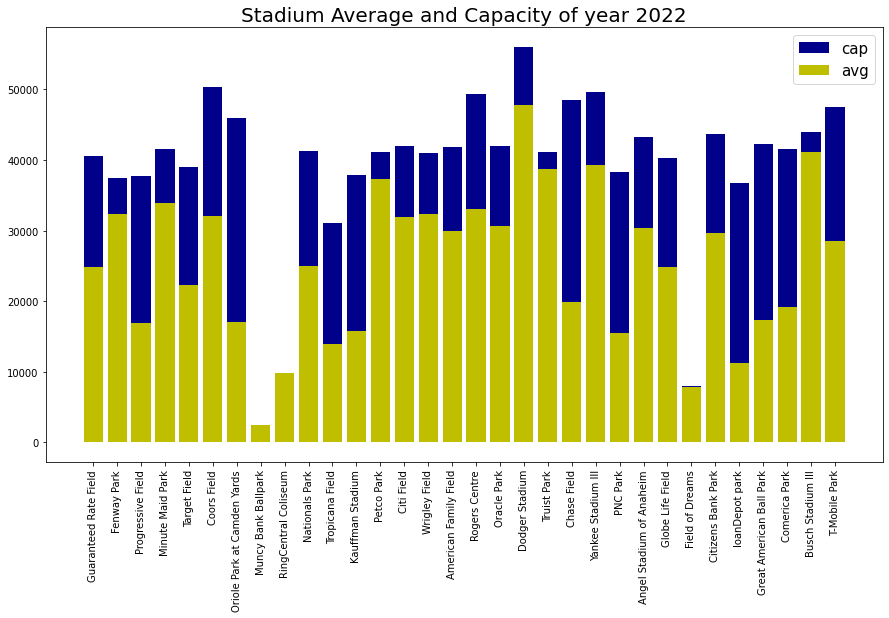

In [13]:
plt.figure(figsize=(15, 8))
plt.bar(list(stadium_att.keys()),[find_cap(stadium_cap, key) for key in stadium_att.keys()], color="darkblue", )
plt.bar(list(stadium_att.keys()),[stats.fmean(stadium_att[key]) for key in stadium_att.keys()], color="y")
plt.xticks(rotation=90, fontsize=10)
plt.title("Stadium Average and Capacity of year 2022", fontsize=20)
plt.legend(["cap", "avg"], fontsize=15)
plt.show()

### Explore on team of whole season

In [14]:
stadium_info = pd.read_csv("../sportsdata/stadium_info.csv")
stadium_info

,Name,Location,Surface,Team,Opened,Distance to center field,Type,Roof type
0,American Family Fielddouble-dagger,"Milwaukee, Wisconsin",Grass,Milwaukee Brewers,2001,400 feet (122 m),Retro-modern,Retractable
1,Angel Stadium,"Anaheim, California",Grass,Los Angeles Angels,1966,396 feet (121 m),Modern,Open
2,Busch Stadium,"St. Louis, Missouri",Grass,St. Louis Cardinals,2006,400 feet (122 m),Retro-classic,Open
3,Chase Fielddouble-dagger,"Phoenix, Arizona",Artificial turf,Arizona Diamondbacks,1998,407 feet (124 m),Retro-modern,Retractable
4,Citi Field,"Queens, New York",Grass,New York Mets,2009,408 feet (124 m),Retro-classic,Open
5,Citizens Bank Park,"Philadelphia, Pennsylvania",Grass,Philadelphia Phillies,2004,401 feet (122 m),Retro-classic,Open
6,Comerica Park,"Detroit, Michigan",Grass,Detroit Tigers,2000,420 feet (128 m),Retro-classic,Open
7,Coors Field,"Denver, Colorado",Grass,Colorado Rockies,1995,415 feet (126 m),Retro-classic,Open
8,Dodger Stadium,"Los Angeles, California",Grass,Los Angeles Dodgers[nb 2],1962,395 feet (120 m),Modern,Open
9,Fenway Park,"Boston, Massachusetts",Grass,Boston Red Sox[nb 3],1912,390 feet (119 m),Jewel box,Open


In [15]:
def find_team_cap(cap_df, stad_df, team_name):
    temp_stad_df = stad_df
    temp_stad_df["Team"] = [name.lower().replace(" ", "").replace(".", "").split("[")[0] for name in temp_stad_df["Team"]]
    row = temp_stad_df[temp_stad_df["Team"] == team_name.lower().replace(" ", "").replace(".", "")].iloc[0]

    if team_name.lower().replace(" ", "").replace(".", "") == "oaklandathletics":
        return 35067

    return find_cap(cap_df, row["Name"])

find_team_cap(stadium_cap, stadium_info, "New York Mets")

41922

In [16]:
team = set([data[key]["team1"]["name"] for key in data.keys()] + [data[key]["team2"]["name"] for key in data.keys()])

team_att = {k: list() for k in team}

for key in data.keys():
    meta_game_info = data[key]["meta_game_info"]
    team_name_1 = data[key]["team1"]["name"]
    team_name_2 = data[key]["team2"]["name"]
    team_att[team_name_1].append(meta_game_info["att"])
    team_att[team_name_2].append(meta_game_info["att"])

result_df = pd.DataFrame(columns=["Name", "mean", "stdev", "cnt", "cap"])

for key in team_att.keys():
    result_df = result_df.append({
            "Name": key,
            "mean": stats.fmean(team_att[key]),
            "stdev": stats.stdev(team_att[key]),
            "cnt": len(team_att[key]),
            "cap": find_team_cap(stadium_cap, stadium_info, key),
        }, ignore_index=True)
    # print("mean: ", stats.fmean(stadium_att[key]), "stdev: ", stats.stdev(stadium_att[key]), "cnt: ", len(stadium_att[key]), "cap: ", cap)

result_df

,Name,mean,stdev,cnt,cap
0,CincinnatiReds,23593.765432,11822.266801,162,42319
1,ChicagoCubs,30675.203704,9243.389558,162,40929
2,BostonRedSox,29257.45679,9189.069769,162,37499
3,BaltimoreOrioles,21512.746914,10579.590822,162,45971
4,PhiladelphiaPhillies,30189.692737,10314.122575,179,43651
5,AtlantaBraves,33516.945783,10403.076393,166,41149
6,NewYorkMets,30510.012121,10488.621404,165,41922
7,MinnesotaTwins,22389.030864,9030.399744,162,39021
8,KansasCityRoyals,18985.376543,8443.036732,162,37903
9,LosAngelesAngels,27950.462963,10349.447125,162,43250


In [17]:
team

{'ArizonaDiamondbacks',
 'AtlantaBraves',
 'BaltimoreOrioles',
 'BostonRedSox',
 'ChicagoCubs',
 'ChicagoWhiteSox',
 'CincinnatiReds',
 'ClevelandGuardians',
 'ColoradoRockies',
 'DetroitTigers',
 'HoustonAstros',
 'KansasCityRoyals',
 'LosAngelesAngels',
 'LosAngelesDodgers',
 'MiamiMarlins',
 'MilwaukeeBrewers',
 'MinnesotaTwins',
 'NewYorkMets',
 'NewYorkYankees',
 'OaklandAthletics',
 'PhiladelphiaPhillies',
 'PittsburghPirates',
 'SanDiegoPadres',
 'SanFranciscoGiants',
 'SeattleMariners',
 'StLouisCardinals',
 'TampaBayRays',
 'TexasRangers',
 'TorontoBlueJays',
 'WashingtonNationals'}

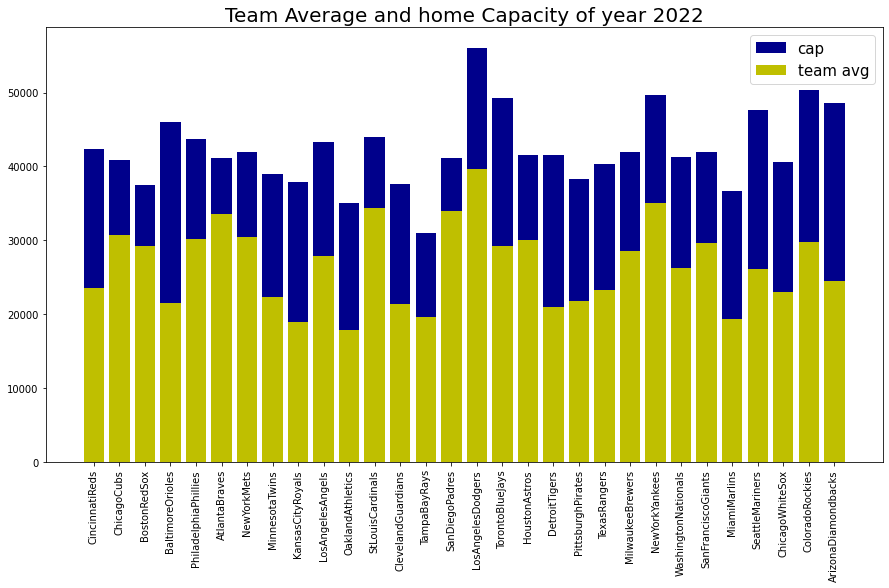

In [18]:
plt.figure(figsize=(15, 8))
plt.bar(list(team_att.keys()),[find_team_cap(stadium_cap, stadium_info, key) for key in team_att.keys()], color="darkblue",)
plt.bar(list(team_att.keys()),[stats.fmean(team_att[key]) for key in team_att.keys()], color="y")
plt.xticks(rotation=90, fontsize=10)
plt.title("Team Average and home Capacity of year 2022", fontsize=20)
plt.legend(["cap", "team avg"], fontsize=15)
plt.show()

### Baseline of prediction


#### Easy baseline

Take mean of avg attendance of stadium

## Weather


In [19]:
weather_description_set = set()
outlier = list()

weather_result = list()
for index, key in enumerate(data.keys()):
    # print(len(data[key]["meta_game_info"]["Start Time Weather"].split(",")))
    if  len(data[key]["meta_game_info"]["Start Time Weather"].split(",")) < 3:
        outlier.append(data[key]["meta_game_info"]["Start Time Weather"])
    else:
        weather_description_set.add(
            data[key]["meta_game_info"]["Start Time Weather"].split(",")[2].strip().replace(".", "")
        )
        weather_result.append({
            "att": data[key]["meta_game_info"]["att"],
            "temp": int(data[key]["meta_game_info"]["Start Time Weather"].split(",")[0].strip().split("°")[0]),
            "description": data[key]["meta_game_info"]["Start Time Weather"].split(",")[2].strip().replace(".", ""),
        })


    # print(data[key]["meta_game_info"]["Start Time Weather"])


print(weather_description_set)

print("Error data: ", len(outlier))

print(len(weather_result))

{'In Dome', 'Cloudy', 'Sunny', 'Overcast'}
Error data:  26
2444


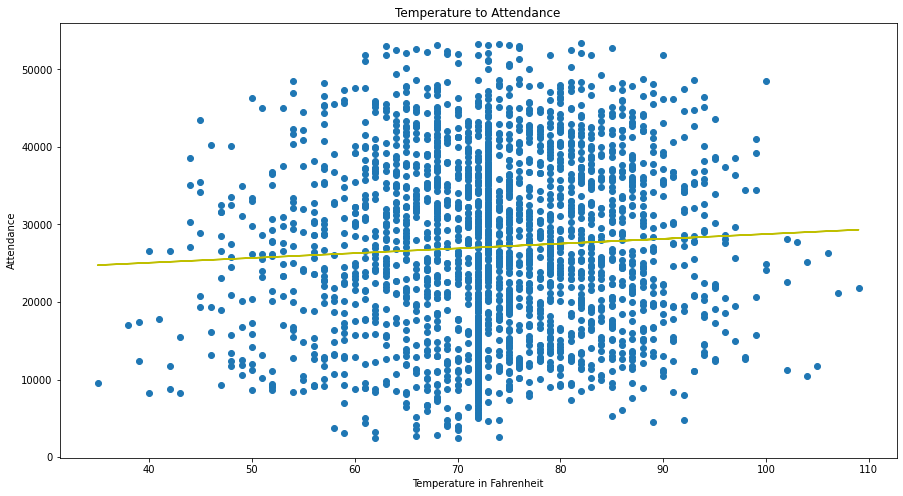

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
import numpy as np

X, Y = [d["temp"] for d in weather_result], [d["att"] for d in weather_result]

plt.figure(figsize=(15, 8))
plt.scatter(X, Y)

X, Y = np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1)
plt.plot(X, RidgeCV().fit(X, Y).predict(X), color="y")
plt.ylabel("Attendance")
plt.xlabel("Temperature in Fahrenheit")
plt.title("Temperature to Attendance")
plt.show()

In [21]:
weather_result

[{'att': 44723, 'temp': 93, 'description': 'Sunny'},
 {'att': 35508, 'temp': 93, 'description': 'Sunny'},
 {'att': 40545, 'temp': 63, 'description': 'Cloudy'},
 {'att': 35112, 'temp': 44, 'description': 'Cloudy'},
 {'att': 28459, 'temp': 47, 'description': 'Cloudy'},
 {'att': 46256, 'temp': 50, 'description': 'Cloudy'},
 {'att': 35052, 'temp': 52, 'description': 'Cloudy'},
 {'att': 42719, 'temp': 93, 'description': 'Sunny'},
 {'att': 17297, 'temp': 95, 'description': 'Sunny'},
 {'att': 40234, 'temp': 46, 'description': 'Cloudy'},
 {'att': 48627, 'temp': 66, 'description': 'Sunny'},
 {'att': 43480, 'temp': 45, 'description': 'Cloudy'},
 {'att': 35462, 'temp': 45, 'description': 'Sunny'},
 {'att': 46097, 'temp': 59, 'description': 'Cloudy'},
 {'att': 44232, 'temp': 64, 'description': 'Sunny'},
 {'att': 40853, 'temp': 69, 'description': 'Sunny'},
 {'att': 25025, 'temp': 72, 'description': 'In Dome'},
 {'att': 45022, 'temp': 68, 'description': 'In Dome'},
 {'att': 25677, 'temp': 62, 'descr

In Dome
mean:  22465.629464285714 stdev:  10385.218079792883
Cloudy
mean:  28050.6083984375 stdev:  10936.030114384519
Sunny
mean:  28856.932752179328 stdev:  12213.832940470264
Overcast
mean:  25712.260355029586 stdev:  10141.255507926515


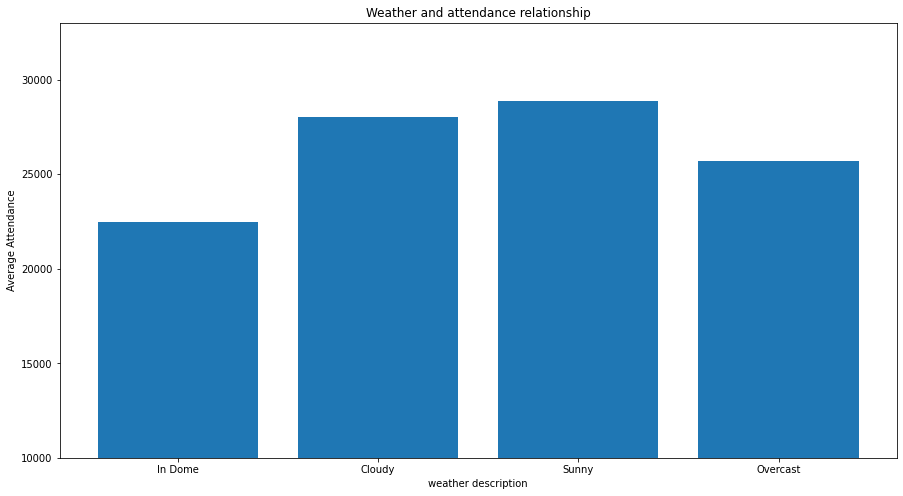

In [22]:
description_result = {k: list() for k in list(weather_description_set)}

for result in weather_result:
    description_result[result["description"]].append(result["att"])

for k in list(weather_description_set):
    print(k)
    print("mean: ", stats.fmean(description_result[k]), "stdev: ", stats.stdev(description_result[k]))

plt.figure(figsize=(15, 8))
plt.bar(x=list(weather_description_set), height=[stats.fmean(description_result[k]) for k in list(weather_description_set)])
plt.ylim(10000, 33000)

plt.xlabel("weather description")
plt.ylabel("Average Attendance")
plt.title("Weather and attendance relationship")
plt.show()

### Explore difference in starting pitcher

以天使隊為例

In [99]:
pitch_dict_cnt

{'Shohei Ohtani P': {'cnt': 27,
  'att': [44723,
   21440,
   29049,
   28557,
   29476,
   21045,
   20366,
   28228,
   30518,
   28595,
   21485,
   34792,
   27612,
   18741,
   27803,
   42867,
   29718,
   25190,
   9351,
   23096,
   23064,
   45311,
   38244,
   38533,
   35538,
   24896,
   31293,
   11232]},
 'Reid Detmers P': {'cnt': 24,
  'att': [42719,
   28723,
   31679,
   18826,
   27679,
   39313,
   17727,
   22950,
   33476,
   26587,
   50812,
   20189,
   27814,
   34496,
   42663,
   29257,
   27065,
   43027,
   23581,
   40754,
   22464,
   12461,
   24929,
   30959,
   32939]},
 'Noah Syndergaard P': {'cnt': 14,
  'att': [36139,
   34493,
   43883,
   29793,
   19537,
   15110,
   23791,
   31242,
   29395,
   51013,
   22234,
   21973,
   13338,
   27180,
   16616]},
 'Jose Suarez P': {'cnt': 19,
  'att': [41253,
   22650,
   41984,
   33762,
   27627,
   20804,
   36048,
   19521,
   44728,
   20834,
   22920,
   5440,
   20294,
   8810,
   44537,
   19518,
 

In [100]:
pitch_dict_cnt.keys()

dict_keys(['Shohei Ohtani P', 'Reid Detmers P', 'Noah Syndergaard P', 'Jose Suarez P', 'Michael Lorenzen P', 'Patrick Sandoval P', 'Jimmy Herget P', 'Jhonathan Diaz P', 'Chase Silseth P', 'Kenny Rosenberg P', 'Andrew Wantz P', 'Janson Junk P', 'Jaime Barria P', 'Tucker Davidson P', 'Touki Toussaint P', 'Mike Mayers P'])

In [23]:
target_team = "HoustonAstros"
pitch_dict_home = dict()
pitch_dict_away = dict()

for key in data.keys():
    d = data[key]
    if d["team1"]["name"] == target_team:
        player_df = d["team1"]["player_df"]

        player_df["pos"] = [player.split(" ")[-1]for player in player_df["Batting"]]
        row = player_df[player_df["pos"] == "P"].iloc[0]

        if row["Batting"] not in pitch_dict_away:
            pitch_dict_away[row["Batting"]] = {
                "cnt": 0,
                "att": [d["meta_game_info"]["att"]]
            }
        else:
            pitch_dict_away[row["Batting"]]["cnt"] += 1
            pitch_dict_away[row["Batting"]]["att"].append(d["meta_game_info"]["att"])

    elif d["team2"]["name"] == target_team:
        player_df = d["team2"]["player_df"]

        player_df["pos"] = [player.split(" ")[-1]for player in player_df["Batting"]]
        row = player_df[player_df["pos"] == "P"].iloc[0]

        if row["Batting"] not in pitch_dict_home:
            pitch_dict_home[row["Batting"]] = {
                "cnt": 0,
                "att": [d["meta_game_info"]["att"]]
            }
        else:
            pitch_dict_home[row["Batting"]]["cnt"] += 1
            pitch_dict_home[row["Batting"]]["att"].append(d["meta_game_info"]["att"])
    else:
        continue

for pitch in pitch_dict_home:
    print(pitch)
    print(len(pitch_dict_home[pitch]["att"]))

Luis Garcia P
15
Framber Valdez P
18
Jake Odorizzi P
6
Justin Verlander P
18
Jose Urquidy P
13
Cristian Javier P
12
Lance McCullers Jr. P
5
Hunter Brown P
1


In [24]:
for pitch in pitch_dict_home.keys():
    if pitch_dict_home[pitch]["cnt"] < 5:
        continue
    else:
        print(pitch)
        print(stats.fmean(pitch_dict_home[pitch]["att"]), stats.stdev(pitch_dict_home[pitch]["att"]), len(pitch_dict_home[pitch]["att"]))

Luis Garcia P
35517.666666666664 4211.690628759543 15
Framber Valdez P
34448.5 5457.2191393872135 18
Jake Odorizzi P
32924.5 3852.8529040180083 6
Justin Verlander P
34797.166666666664 5145.696114229832 18
Jose Urquidy P
33215.0 5059.712261252281 13
Cristian Javier P
31890.916666666668 5657.131805531096 12


In [112]:
pitch_dict_home_valid = dict()

for key in pitch_dict_home.keys():
    if pitch_dict_home[key]["cnt"] < 5:
        continue
    else:
        pitch_dict_home_valid[key] = pitch_dict_home[key]

In [113]:
pitch_dict_home_valid

{'Shohei Ohtani P': {'cnt': 13,
  'att': [44723,
   28557,
   21045,
   28228,
   28595,
   34792,
   27612,
   27803,
   29718,
   25190,
   23096,
   38244,
   35538,
   31293]},
 'Reid Detmers P': {'cnt': 12,
  'att': [42719,
   31679,
   18826,
   39313,
   22950,
   26587,
   20189,
   34496,
   29257,
   43027,
   22464,
   24929,
   32939]},
 'Noah Syndergaard P': {'cnt': 7,
  'att': [36139, 43883, 19537, 23791, 29395, 22234, 21973, 27180]},
 'Jose Suarez P': {'cnt': 9,
  'att': [41253,
   41984,
   27627,
   44728,
   22920,
   20294,
   44537,
   19518,
   15594,
   32472]},
 'Michael Lorenzen P': {'cnt': 8,
  'att': [20480, 23099, 30666, 39045, 34005, 36408, 35704, 37480, 23573]},
 'Patrick Sandoval P': {'cnt': 12,
  'att': [16132,
   22551,
   32337,
   40042,
   36568,
   36598,
   35466,
   44648,
   29906,
   33459,
   43555,
   15756,
   19374]}}

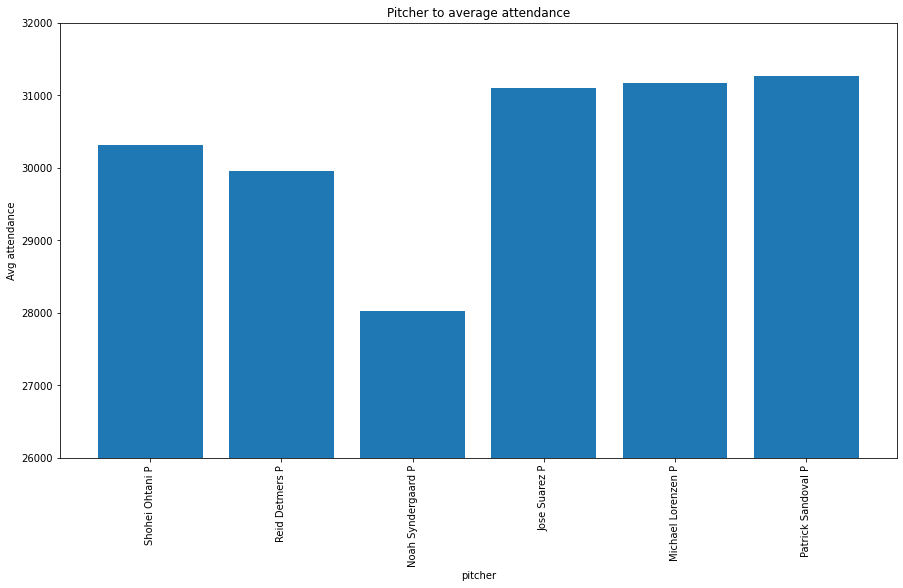

In [116]:
plt.figure(figsize=(15, 8))
plt.bar(list(pitch_dict_home_valid.keys()), [stats.fmean([att for att in pitch_dict_home_valid[pitch]["att"]]) for pitch in pitch_dict_home_valid.keys()])
plt.xticks(rotation=90)
plt.xlabel("pitcher")
plt.ylabel("Avg attendance")
plt.title("Pitcher to average attendance")
plt.ylim(26000, 32000)
plt.show()

In [106]:
for pitch in pitch_dict_away.keys():
    if pitch_dict_away[pitch]["cnt"] < 5:
        continue
    else:
        print(pitch)
        print(stats.fmean(pitch_dict_away[pitch]["att"]), stats.stdev(pitch_dict_away[pitch]["att"]), len(pitch_dict_away[pitch]["att"]))

Shohei Ohtani P
26166.35714285714 10693.729842274885 14
Reid Detmers P
30309.5 10620.945878952418 12
Noah Syndergaard P
27372.14285714286 13499.660482503148 7
Jose Suarez P
20642.1 9642.734091878023 10
Michael Lorenzen P
27355.666666666668 13291.189713490663 9
Patrick Sandoval P
24990.85714285714 11897.718125481313 14


### Data visualzation

In [2]:
train = pd.read_csv("../data-processing/processed_training_ori.csv")
test = pd.read_csv("../data-processing/processed_testing_ori.csv")

all_data = pd.concat([train, test], axis=0, ignore_index=True)

In [8]:
all_data['salary-1500'].describe()

count    14715.000000
mean         5.418009
std          2.691589
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         16.000000
Name: salary-1500, dtype: float64

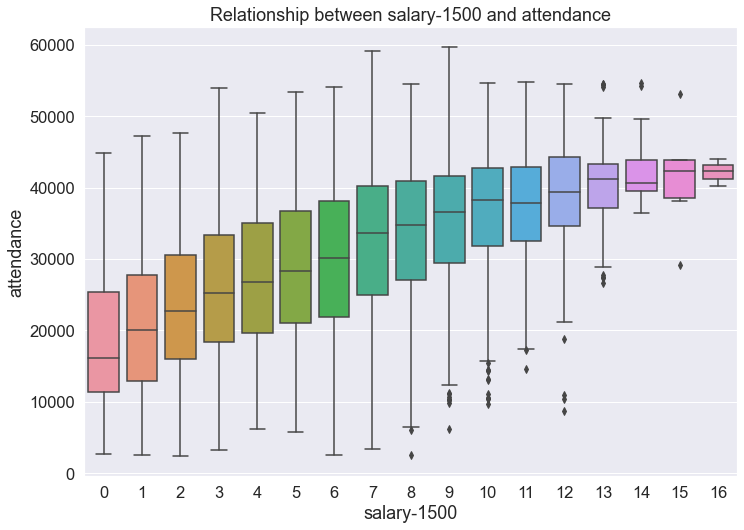

In [9]:
# plot relationship between salary-1500 and attendance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

ax = sns.boxplot(x="salary-1500",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-1500 and attendance")
plt.show()

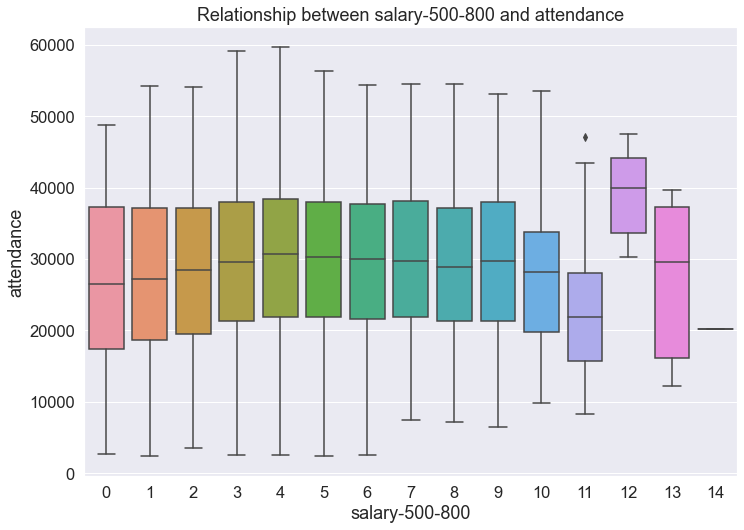

In [10]:
# plot relationship between salary-500-800 and attendance
ax = sns.boxplot(x="salary-500-800",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-500-800 and attendance")
plt.show()

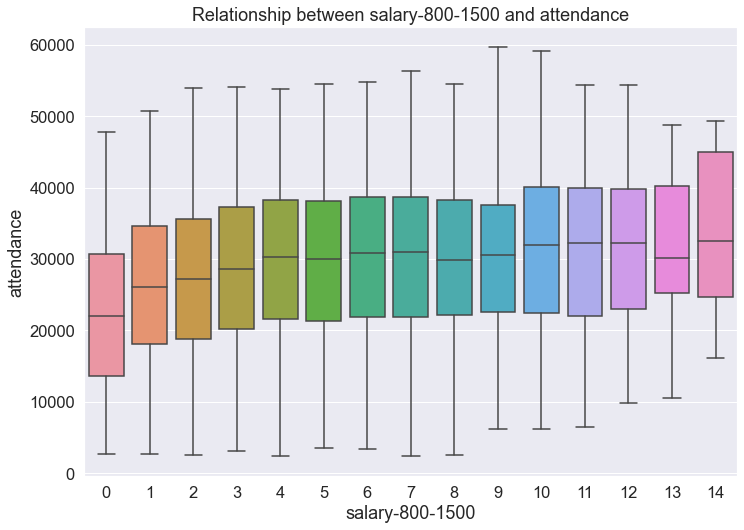

In [11]:
# plot relationship between salary-800-1500 and attendance
ax = sns.boxplot(x="salary-800-1500",y = "attendance", data=all_data)
ax.set_title("Relationship between salary-800-1500 and attendance")
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

In [4]:
train_w_pre_5_10 = pd.read_csv("../models-v2-lle/trainset_w_lle.csv")
test_w_pre_5_10 = pd.read_csv("../models-v2-lle/testset_w_lle.csv")

all_data_w_pre_5_10 = pd.concat([train_w_pre_5_10, test_w_pre_5_10], axis=0, ignore_index=True)

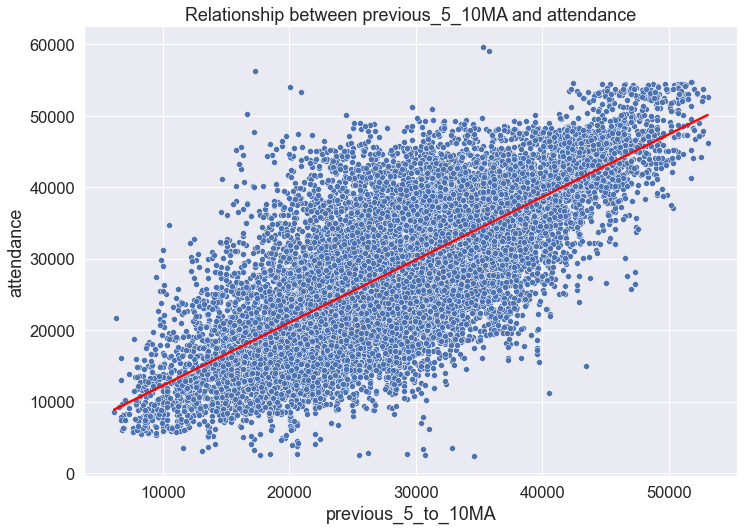

In [11]:
# plot relationship between previous_5_10MA and attendance
ax = sns.scatterplot(x="previous_5_to_10MA",y = "attendance", data=all_data_w_pre_5_10)
# draw regression line
sns.regplot(x="previous_5_to_10MA",y = "attendance", data=all_data_w_pre_5_10, scatter=False, color="red")
ax.set_title("Relationship between previous_5_10MA and attendance")
plt.show()

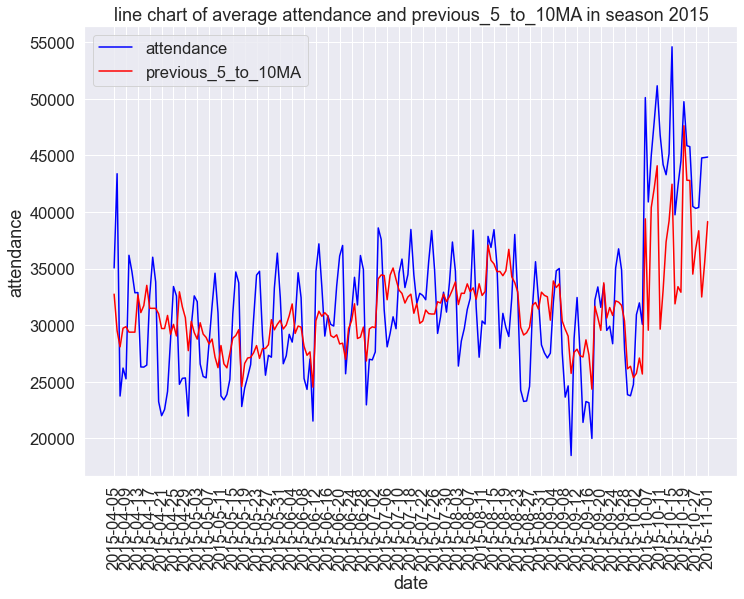

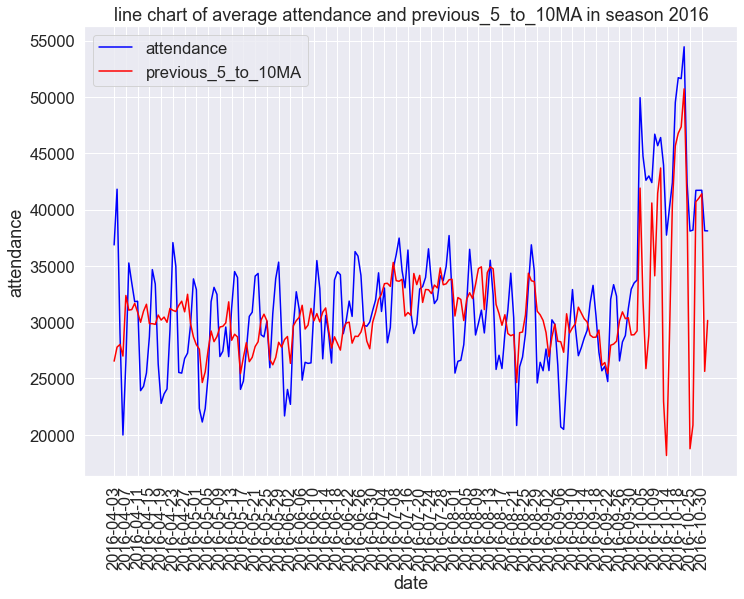

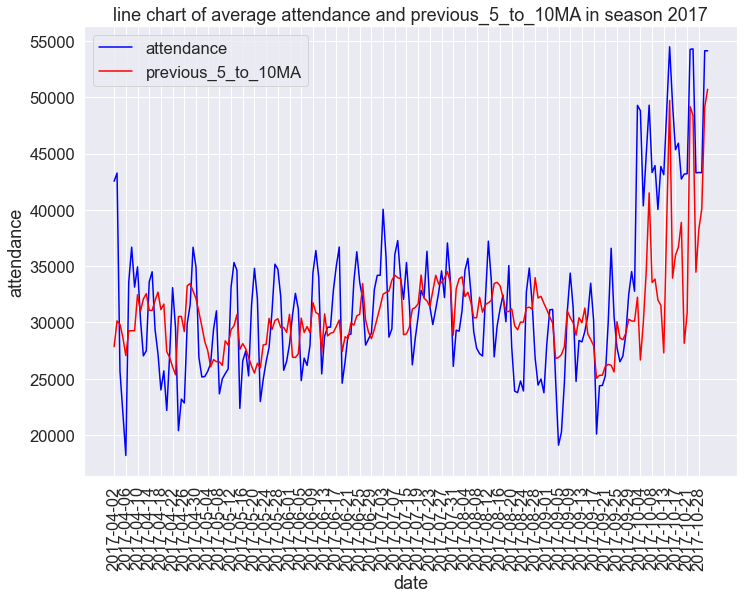

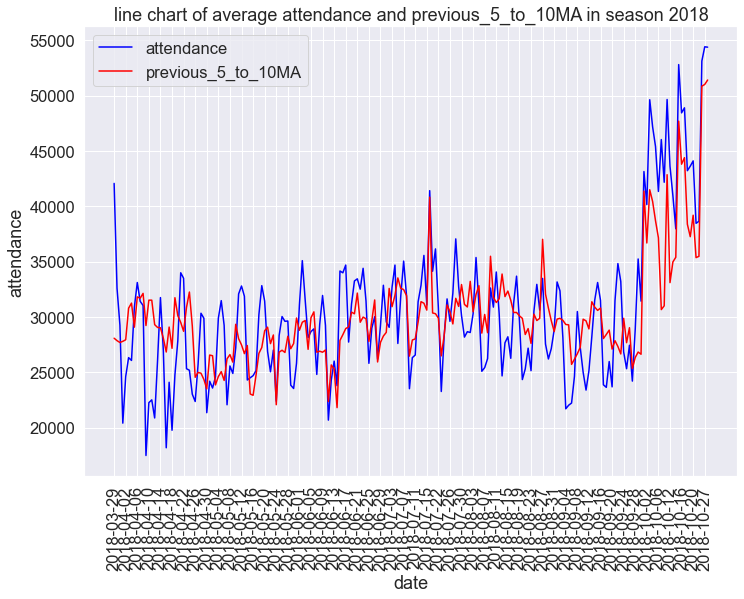

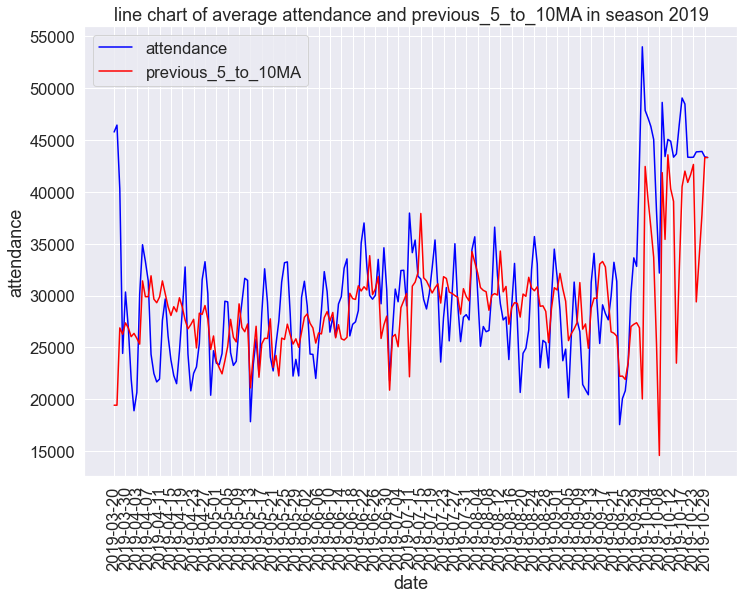

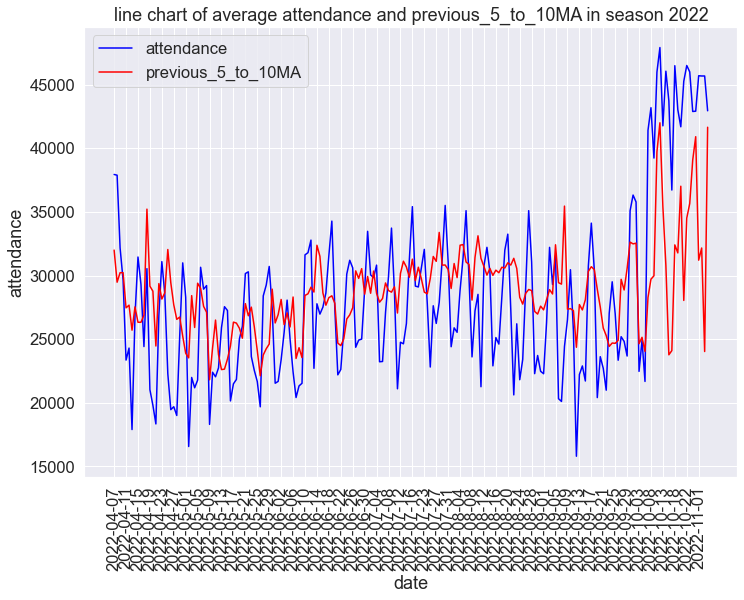

In [19]:
# for every season, draw line chart of attendance and previous_5_to_10MA
pd.options.mode.chained_assignment = None
seasons = all_data_w_pre_5_10['season'].unique()
for season in seasons:
    # we calculate every day's average attendance and previous_5_to_10MA
    season_data = all_data_w_pre_5_10[all_data_w_pre_5_10['season'] == season]
    # start_time column is in format of "2015-10-27 00:00:00", we only need the date
    season_data['start_time'] = season_data['start_time'].apply(lambda x: x.split(' ')[0])
    season_data = season_data.groupby('start_time').mean()
    season_data = season_data.reset_index()
    # plot line chart
    ax = sns.lineplot(x="start_time",y = "attendance", data=season_data, color="blue")
    ax = sns.lineplot(x="start_time",y = "previous_5_to_10MA", data=season_data, color="red")
    ax.set_title(f"line chart of average attendance and previous_5_to_10MA in season {season}")
    # set x axis label vertical
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    # increase x interval
    ax.set_xticks(ax.get_xticks()[::4])
    # set legend
    ax.legend(['attendance', 'previous_5_to_10MA'])
    # set x axis label
    ax.set_xlabel("date")
    # set y axis label
    ax.set_ylabel("attendance")
    plt.show()

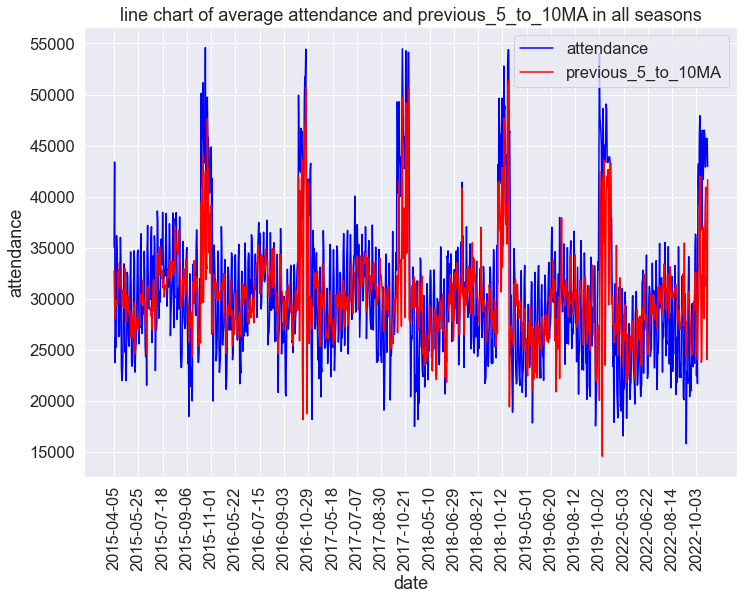

In [24]:
# groupby date and calculate average attendance and previous_5_to_10MA for all seasons
all_data_w_pre_5_10['start_time'] = all_data_w_pre_5_10['start_time'].apply(lambda x: x.split(' ')[0])
all_data_w_pre_5_10 = all_data_w_pre_5_10.groupby('start_time').mean()
all_data_w_pre_5_10 = all_data_w_pre_5_10.reset_index()
# plot line chart
ax = sns.lineplot(x="start_time",y = "attendance", data=all_data_w_pre_5_10, color="blue")
ax = sns.lineplot(x="start_time",y = "previous_5_to_10MA", data=all_data_w_pre_5_10, color="red")
ax.set_title(f"line chart of average attendance and previous_5_to_10MA in all seasons")
# set x axis label vertical
for item in ax.get_xticklabels():
    item.set_rotation(90)
# increase x interval
ax.set_xticks(ax.get_xticks()[::50])
# set legend
ax.legend(['attendance', 'previous_5_to_10MA'])
# set x axis label
ax.set_xlabel("date")
# set y axis label
ax.set_ylabel("attendance")
plt.show()

In [25]:
# calculate correlation between previous_5_to_10MA and attendance
corr = all_data_w_pre_5_10['previous_5_to_10MA'].corr(all_data_w_pre_5_10['attendance'])
print(f"correlation betwee previous_5_to_10MA and attendance is {corr}")

correlation betwee previous_5_to_10MA and attendance is 0.6361285668783949


## Analysis on seasonal data

In [140]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from os import walk


## Simply test a team within a season to take a look at the data

In [7]:
# read the file and display
df = pd.read_csv("../data/season_record_LAA_2017.csv", index_col=0)
display(df.head())
display(df.tail())

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Monday, Apr 3",LAA,@,OAK,L,2.0,4.0,9.0,0-1,3.0,1.0,Graveman,Nolasco,Casilla,2:56,N,36067.0,1.05,-1,NaN
2,"Tuesday, Apr 4",LAA,@,OAK,W,7.0,6.0,9.0,1-1,2.0,1.0,Bailey,Dull,Bedrosian,3:17,N,11225.0,1.02,1,NaN
3,"Wednesday, Apr 5",LAA,@,OAK,W,5.0,0.0,9.0,2-1,2.0,1.0,Ramirez,Cotton,None,3:15,N,13405.0,1.08,2,NaN
4,"Thursday, Apr 6",LAA,@,OAK,L,1.0,5.0,9.0,2-2,2.0,1.0,Triggs,Skaggs,None,2:44,D,13292.0,1.15,-1,NaN
5,"Friday, Apr 7",LAA,Home,SEA,W,5.0,1.0,9.0,3-2,1.0,Tied,Chavez,Gallardo,None,2:56,N,43911.0,1.09,1,NaN


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
158,"Wednesday, Sep 27",LAA,@,CHW,L-wo,4.0,6.0,10.0,78-80,2.0,20.0,Farquhar,Parker,None,3:58,N,17012.0,0.01,-1,NaN
159,"Thursday, Sep 28",LAA,@,CHW,L,4.0,5.0,9.0,78-81,2.0,21.0,Infante,Chavez,Minaya,3:04,N,19596.0,0.00,-2,NaN
160,"Friday, Sep 29",LAA,Home,SEA,W,6.0,5.0,9.0,79-81,2.0,21.0,Wood,Rzepczynski,Parker,3:01,N,35106.0,0.00,1,NaN
161,"Saturday, Sep 30",LAA,Home,SEA,L,4.0,6.0,9.0,79-82,2.0,21.0,Lawrence,Bedrosian,Díaz,3:32,N,38075.0,0.00,-1,NaN
162,"Sunday, Oct 1",LAA,Home,SEA,W,6.0,2.0,9.0,80-82,2.0,21.0,Bridwell,Simmons,None,2:38,D,34940.0,0.00,1,NaN


In [25]:
# construct a new dataframe with the columns we want
statistics_df = df[["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"]]
# add columns for previous w/l, w-l and rank
statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
statistics_df["Prev_Rank"] = statistics_df["Rank"].shift(1)
statistics_df["Prev_Streak"] = statistics_df["Streak"].shift(1)
# add a column to determine if last game was overtime or not (using W/L column, if the value contains -wo, then it was overtime)
statistics_df["Prev_IsOvertime"] = statistics_df["W/L"].apply(lambda x: 1 if "-wo" in str(x) else 0).shift(1)

# add a winning-rate column (W / (W + L))

statistics_df["Winning_Rate"] = statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0])) / statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))
# add a column to show the game day of the week
statistics_df["Day"] = statistics_df["Date"].apply(lambda x: x.split(",")[0])
# add a column to show the game month
statistics_df["Month"] = statistics_df["Date"].apply(lambda x: x.split(",")[1].split(" ")[1])

# convert values containing -wo in W/L and Prev_W/L to W or L
statistics_df["W/L"] = statistics_df["W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
statistics_df["Prev_W/L"] = statistics_df["Prev_W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)

# display the new dataframe
display(statistics_df.head())
display(statistics_df.tail())


C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
1,"Monday, Apr 3",L,0-1,3.0,36067.0,-1,NaN,0-0,NaN,NaN,NaN,NaN,Monday,Apr
2,"Tuesday, Apr 4",W,1-1,2.0,11225.0,1,L,0-1,3.0,-1.0,0.0,0.000000,Tuesday,Apr
3,"Wednesday, Apr 5",W,2-1,2.0,13405.0,2,W,1-1,2.0,1.0,0.0,0.500000,Wednesday,Apr
4,"Thursday, Apr 6",L,2-2,2.0,13292.0,-1,W,2-1,2.0,2.0,0.0,0.666667,Thursday,Apr
5,"Friday, Apr 7",W,3-2,1.0,43911.0,1,L,2-2,2.0,-1.0,0.0,0.500000,Friday,Apr


,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
158,"Wednesday, Sep 27",L,78-80,2.0,17012.0,-1,W,78-79,2.0,1.0,0.0,0.496815,Wednesday,Sep
159,"Thursday, Sep 28",L,78-81,2.0,19596.0,-2,L,78-80,2.0,-1.0,1.0,0.493671,Thursday,Sep
160,"Friday, Sep 29",W,79-81,2.0,35106.0,1,L,78-81,2.0,-2.0,0.0,0.490566,Friday,Sep
161,"Saturday, Sep 30",L,79-82,2.0,38075.0,-1,W,79-81,2.0,1.0,0.0,0.493750,Saturday,Sep
162,"Sunday, Oct 1",W,80-82,2.0,34940.0,1,L,79-82,2.0,-1.0,0.0,0.490683,Sunday,Oct


Text(0, 0.5, 'Winning Rate')

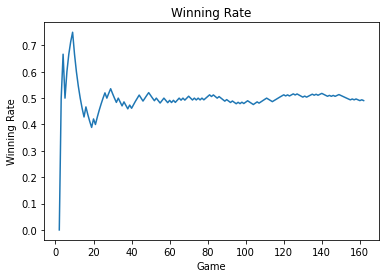

In [26]:
# plot winning rate line chart
plt.plot(statistics_df["Winning_Rate"])
plt.title("Winning Rate")
plt.xlabel("Game")
plt.ylabel("Winning Rate")

Text(0, 0.5, 'Attendance')

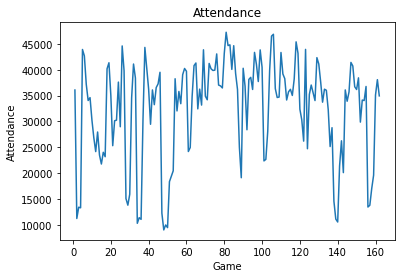

In [27]:
# plot attendance line chart
plt.plot(statistics_df["Attendance"])
plt.title("Attendance")
plt.xlabel("Game")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

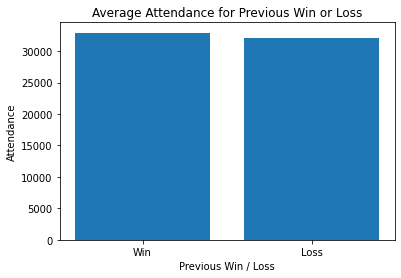

In [28]:
# plot a bar chart to see if previous game was win or loss, the average attendance difference

# calculate the average attendance when the previous game was win
prev_win_attendance = statistics_df[statistics_df["Prev_W/L"] == "W"]["Attendance"].mean()
# calculate the average attendance when the previous game was loss
prev_loss_attendance = statistics_df[statistics_df["Prev_W/L"] == "L"]["Attendance"].mean()
# plot bar chart
plt.bar(["Win", "Loss"], [prev_win_attendance, prev_loss_attendance])
plt.title("Average Attendance for Previous Win or Loss")
plt.xlabel("Previous Win / Loss")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

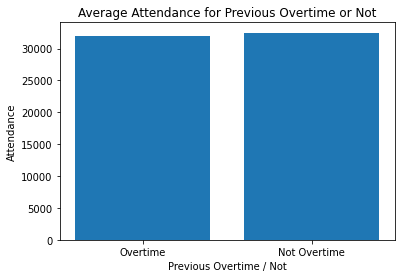

In [29]:
# plot a bar chart to see if previous game was overtime or not, the average attendance difference

# calculate the average attendance when the previous game was overtime
prev_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 1]["Attendance"].mean()
# calculate the average attendance when the previous game was not overtime
prev_not_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 0]["Attendance"].mean()
# plot bar chart
plt.bar(["Overtime", "Not Overtime"], [prev_overtime_attendance, prev_not_overtime_attendance])
plt.title("Average Attendance for Previous Overtime or Not")
plt.xlabel("Previous Overtime / Not")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

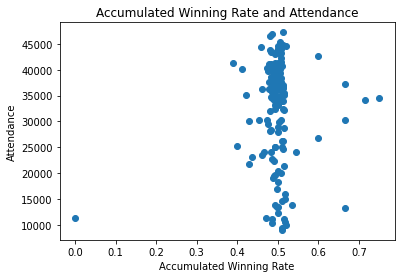

In [30]:
# plot a scatter chart to see accumulated winning rate and attendance

plt.scatter(statistics_df["Winning_Rate"], statistics_df["Attendance"])
plt.title("Accumulated Winning Rate and Attendance")
plt.xlabel("Accumulated Winning Rate")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

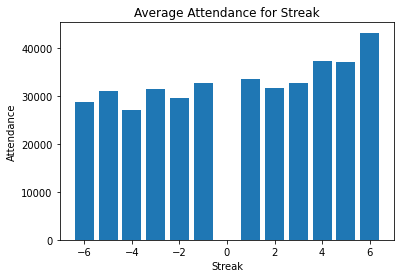

In [31]:
# plot a bar chart to see the streak and attendance

# get the streak values
streak_values = statistics_df["Streak"].unique()
# calculate the average attendance for each streak value
streak_attendance = [statistics_df[statistics_df["Streak"] == streak]["Attendance"].mean() for streak in streak_values]
# plot bar chart
plt.bar(streak_values, streak_attendance)
plt.title("Average Attendance for Streak")
plt.xlabel("Streak")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

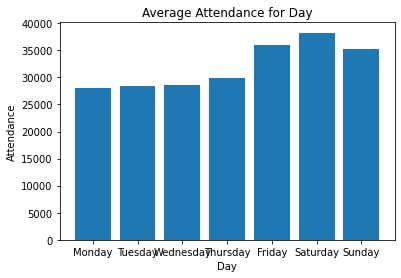

In [32]:
# plot a bar chart to see the day of the week and attendance

# get the day values
day_values = statistics_df["Day"].unique()
# calculate the average attendance for each day value
day_attendance = [statistics_df[statistics_df["Day"] == day]["Attendance"].mean() for day in day_values]
# plot bar chart
plt.bar(day_values, day_attendance)
plt.title("Average Attendance for Day")
plt.xlabel("Day")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

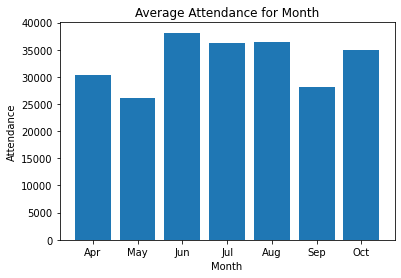

In [33]:
# plot a bar chart to see the month and attendance

# get the month values
month_values = statistics_df["Month"].unique()
# calculate the average attendance for each month value
month_attendance = [statistics_df[statistics_df["Month"] == month]["Attendance"].mean() for month in month_values]
# plot bar chart
plt.bar(month_values, month_attendance)
plt.title("Average Attendance for Month")
plt.xlabel("Month")
plt.ylabel("Attendance")

## Transform the previous analysis into a function

In [170]:
def generate_accumulated_season_record(team_abbr: str, from_year: int = 2015, to_year: int = 2022, exclude_years: set = {2019}) -> pd.DataFrame:
    accumulate_df = pd.DataFrame(columns = ["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"])
    # generate a set for all years
    years = set(range(from_year, to_year + 1))
    # remove excluded years from the set
    years = years - exclude_years
    # for every year, read the season record and transform it to an anaylizable dataframe
    for year in years:
        df = pd.read_csv(f"../data/season_record_{team_abbr}_{year}.csv", index_col=0)
        # construct a new dataframe with the columns we want
        statistics_df = df[["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"]]
        # use isnull to filter out the rows with no attendance data
        statistics_df = statistics_df.dropna(subset=["Attendance"]).reset_index(drop=True)
        # add columns for previous w/l, w-l and rank
        statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
        statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
        statistics_df["Prev_Rank"] = statistics_df["Rank"].shift(1)
        statistics_df["Prev_Streak"] = statistics_df["Streak"].shift(1)
        # add a column to determine if last game was overtime or not (using W/L column, if the value contains -wo, then it was overtime)
        statistics_df["Prev_IsOvertime"] = statistics_df["W/L"].apply(lambda x: 1 if "-wo" in str(x) else 0).shift(1)

        # add a winning-rate column (W / (W + L))

        statistics_df["Winning_Rate"] = statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0])) / statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))
        # add a column to show the game day of the week
        statistics_df["Day"] = statistics_df["Date"].apply(lambda x: x.split(",")[0])
        # add a column to show the game month
        statistics_df["Month"] = statistics_df["Date"].apply(lambda x: x.split(",")[1].split(" ")[1])

        # convert values containing -wo in W/L and Prev_W/L to W or L
        statistics_df["W/L"] = statistics_df["W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
        statistics_df["Prev_W/L"] = statistics_df["Prev_W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
        # concat the new dataframe to the accumulated dataframe
        accumulate_df = pd.concat([accumulate_df, statistics_df], ignore_index=True, sort=False)
    return accumulate_df

In [89]:
pd.options.mode.chained_assignment = None
df = generate_accumulated_season_record("TOR")

In [183]:
def plot_winning_rate_hist(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot histogram to see attendance difference between different winning rates
    # separate winning rates into 4 groups based on the quartiles and ignore nan values
    df = accumulated_season_record[["Winning_Rate", "Attendance"]]
    df = df.dropna(subset=["Winning_Rate"]).reset_index(drop=True)
    # cast winning rate to float
    df["Winning_Rate"] = df["Winning_Rate"].astype(float)
    df["Winning_Rate_Group"] = pd.qcut(df["Winning_Rate"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"])
    # drop nan values in the winning rate group column
    # calculate the average attendance for each winning rate group
    winning_rate_attendance = [df[df["Winning_Rate_Group"] == winning_rate]["Attendance"].mean() for winning_rate in df["Winning_Rate_Group"].unique()]
    # plot bar chart
    # print("winning rate unique values: ", df["Winning_Rate_Group"].unique())
    # print("attendance for winning rate: ", winning_rate_attendance)
    plt.bar(df["Winning_Rate_Group"].unique(), winning_rate_attendance)
    plt.title(f"Average Attendance for Winning Rate for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Winning Rate")
    plt.ylabel("Attendance")

winning rate unique values:  ['75-100%', '25-50%', '0-25%', '50-75%']
Categories (4, object): ['0-25%' < '25-50%' < '50-75%' < '75-100%']
attendance for winning rate:  [29115.621739130434, 29098.092436974788, 28435.958847736627, 27914.254098360656]


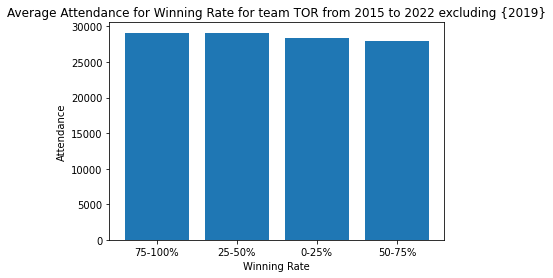

In [91]:
plot_winning_rate_hist(df, "TOR")

In [134]:
def plot_prevWinorLose(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
   # plot bar chart to see the previous win or lose and attendance
   # calculate previous win attendance mean
   df = accumulated_season_record
   prev_win_attendance = df[df["Prev_W/L"] == "W"]["Attendance"].mean()
   # calculate previous lose attendance mean
   prev_lose_attendance = df[df["Prev_W/L"] == "L"]["Attendance"].mean()
   # plot bar chart
   # print(f"previous win counts {df['Prev_W/L'].value_counts()['W']}")
   # print(f"previous lose counts {df['Prev_W/L'].value_counts()['L']}")
   # print(f"previous win attendance mean {prev_win_attendance}")
   # print(f"previous lose attendance mean {prev_lose_attendance}")
   plt.bar(["W", "L"], [prev_win_attendance, prev_lose_attendance])
   plt.title(f"Average Attendance for Previous Win or Lose for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
   plt.xlabel("Previous Win or Lose")
   plt.ylabel("Attendance")

previous win counts 542
previous lose counts 483
previous win attendance mean 28752.480079681274
previous lose attendance mean 28497.152317880795


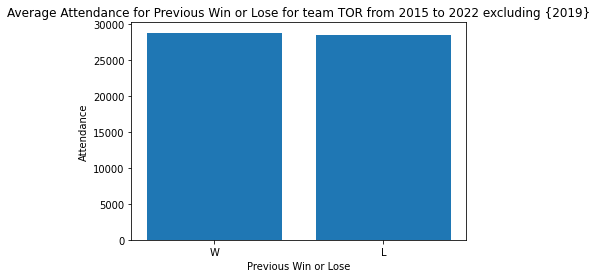

In [116]:
plot_prevWinorLose(df, "TOR")

In [133]:
def plot_streak(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the streak and attendance
    # calculate streak attendance mean
    df = accumulated_season_record
    df = df.dropna(subset=["Prev_Streak"])
    streak_attendance = [df[df["Prev_Streak"] == streak]["Attendance"].mean() for streak in df["Prev_Streak"].unique()]
    # if streak_attendance contains nan, replace it with 0
    streak_attendance = [0 if math.isnan(attendance) else attendance for attendance in streak_attendance]
    # plot bar chart
    # print("streak unique values: ", df["Prev_Streak"].unique())
    # print("attendance for streak: ", streak_attendance)
    plt.bar(df["Prev_Streak"].unique(), streak_attendance)
    plt.xticks(df["Prev_Streak"].unique())
    plt.title(f"Average Attendance for Streak for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Streak")
    plt.ylabel("Attendance")

streak unique values:  [ 1.  2. -1. -2. -3. -4.  3.  4. -5.  5.  6.  7. -6. -7.  8.  9. 10. 11.]
attendance for streak:  [28465.699604743084, 28075.669491525423, 28564.027559055117, 28982.69298245614, 30173.58823529412, 24268.095238095237, 28864.859375, 29791.870967741936, 21140.11111111111, 26742.846153846152, 32044.571428571428, 37642.0, 25786.0, 40743.0, 29115.0, 40877.5, 41599.0, 34430.5]


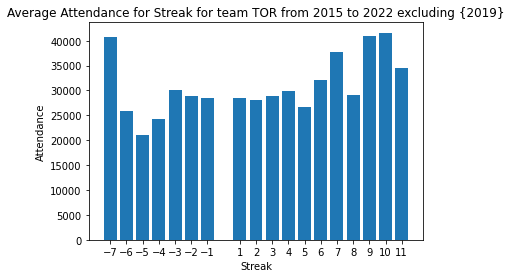

In [118]:
plot_streak(df, "TOR")

In [132]:
def plot_day(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the game day and attendance
    # calculate game day attendance mean
    df = accumulated_season_record
    day_attendance = [df[df["Day"] == day]["Attendance"].mean() for day in df["Day"].unique()]
    # plot bar chart
    # print("day unique values: ", df["Day"].unique())
    # print("attendance for day: ", day_attendance)
    plt.bar(df["Day"].unique(), day_attendance)
    plt.title(f"Average Attendance for Day for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Day")
    plt.ylabel("Attendance")

day unique values:  ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Friday' 'Saturday' 'Thursday']
attendance for day:  [32040.108280254775, 26060.81818181818, 25008.401360544216, 26076.136054421768, 29804.825806451612, 33081.53164556962, 26589.23469387755]


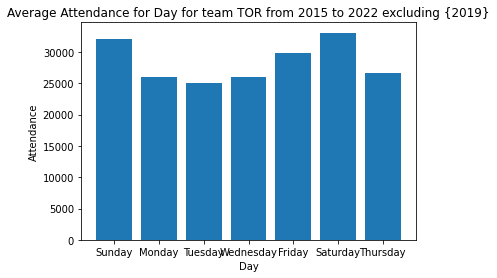

In [120]:
plot_day(df, "TOR")

In [131]:
def plot_month(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the game month and attendance
    # calculate game month attendance mean
    df = accumulated_season_record
    month_attendance = [df[df["Month"] == month]["Attendance"].mean() for month in df["Month"].unique()]
    # plot bar chart
    # print("month unique values: ", df["Month"].unique())
    # print("attendance for month: ", month_attendance)
    plt.bar(df["Month"].unique(), month_attendance)
    plt.title(f"Average Attendance for Month for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Month")
    plt.ylabel("Attendance")

month unique values:  ['Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Mar']
attendance for month:  [25840.853146853147, 25963.725609756097, 28309.95625, 32021.567567567567, 30547.684523809523, 29267.714285714286, 27600.428571428572, 39841.0]


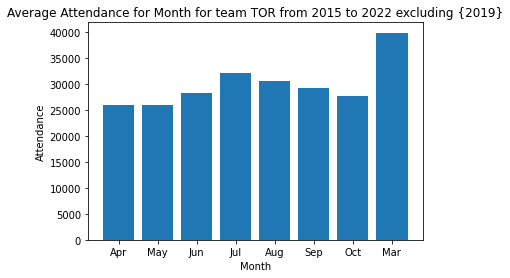

In [122]:
plot_month(df, "TOR")

## For every team, use the function to get the season record and plot related analysis and save the plot

In [191]:
def save_all_statistical_images(teams: list[str]) -> None:
    df = None
    for team in teams:
        if df is None:
            df = generate_accumulated_season_record(team)
        else:
            df = pd.concat([df, generate_accumulated_season_record(team)])
    team = "ALL"
    print(f"Processing team {team}")
    plot_winning_rate_hist(df, team)
    # create a directory for each team if it does not exist
    if not os.path.exists(f"images/{team}"):
        os.makedirs(f"images/{team}")
    plt.savefig(f"images/{team}/winning_rate.jpg")
    plt.clf()
    plot_prevWinorLose(df, team)
    plt.savefig(f"images/{team}/prev_win_or_lose.jpg")
    plt.clf()
    plot_streak(df, team)
    plt.savefig(f"images/{team}/streak.jpg")
    plt.clf()
    plot_day(df, team)
    plt.savefig(f"images/{team}/day.jpg")
    plt.clf()
    plot_month(df, team)
    plt.savefig(f"images/{team}/month.jpg")
    plt.clf()
    print(f"Finished saving team {team} images")

In [190]:
filenames = next(walk("../data/"), (None, None, []))[2]  # [] if no file
teams = set([filename.split("_")[2] for filename in filenames])
print(f"the teams to be processed are {teams}")
save_all_statistical_images(teams)

the teams to be processed are {'MIL', 'SFG', 'TEX', 'CIN', 'DET', 'LAA', 'HOU', 'MIA', 'CHW', 'SDP', 'MIN', 'BOS', 'TBR', 'PHI', 'CLE', 'TOR', 'ARI', 'WSN', 'KCR', 'ATL', 'SEA', 'CHC', 'COL', 'LAD', 'STL', 'BAL', 'PIT', 'NYY', 'OAK', 'NYM'}
